# Lab_2_CV1

Second LAb of CV1. Image Database Import.

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from sklearn.model_selection import train_test_split

Setting the dataset directory and the categories:

In [77]:
DATADIR = "E:/SIVA-Master/AN_1/Sem_1/CV1/Laborator/Poze_Lab_CV1"
CATEGORIES = ["A","B","C","H","I","P","U","V","W","Y"]
IMG_SIZE = 300
dataset = []
scale = 1
delta = 0
ddepth = cv2.CV_16S

Reading each image and placing it into an array


In [78]:
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        #print(f"os.listdir(path) {os.listdir(path)}")
        for img in os.listdir(path):
            try:    
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                #new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) #to be uncom if imgs are resized
                #We calculate the "derivatives" in x (1, 0) and y (0, 1) directions. For this, we use the function Sobel() as shown below
                grad_x = cv2.Sobel(img_array, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT) 
                grad_y = cv2.Sobel(img_array, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
                abs_grad_x = cv2.convertScaleAbs(grad_x)
                abs_grad_y = cv2.convertScaleAbs(grad_y)
                #We try to approximate the gradient by adding both directional gradients (note that this is not an exact calculation at all! but it is good for our purposes).
                grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
                dataset.append([grad, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [79]:
print(len(dataset))

40


In [80]:
X = []
y = []

for features, label in dataset:
    X.append(features)
    y.append(label)
    
#X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  #to be uncommented if chosen to resize imgs

60% train 10% test 30% validare

In [81]:
train_ratio = 0.60
validation_ratio = 0.30
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(f" size of x_train: {len(x_train)}, size of x_val: {len(x_val)}, size of x_test: {len(x_test)}")

 size of x_train: 24, size of x_val: 12, size of x_test: 4



See below a random example of the dataset:

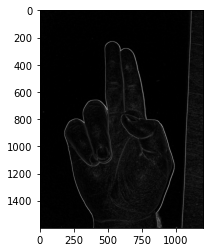

In [82]:
random.shuffle(dataset)
for img_array in dataset[0]:
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break